# Strainkraker Filter
### A tool using standard Kraken2 output (kmer mapping data) to reassign each read to best node classification.

conda create -y --name numpy -c conda-forge -c bioconda numpy jupyter #pandas scikit-learn matplotlib seaborn 
conda activate numpy

### Example Tree 1:
Example Tree 1 represents kmer mappings to tree for a given read. For simplicity in this example, this read that we will assign to a node consists of 100 kmers. Purple integers inside node circles are node names, corresponding to taxonomic classification. Green integers outside node circles are the number of kmers mapping to that node. 

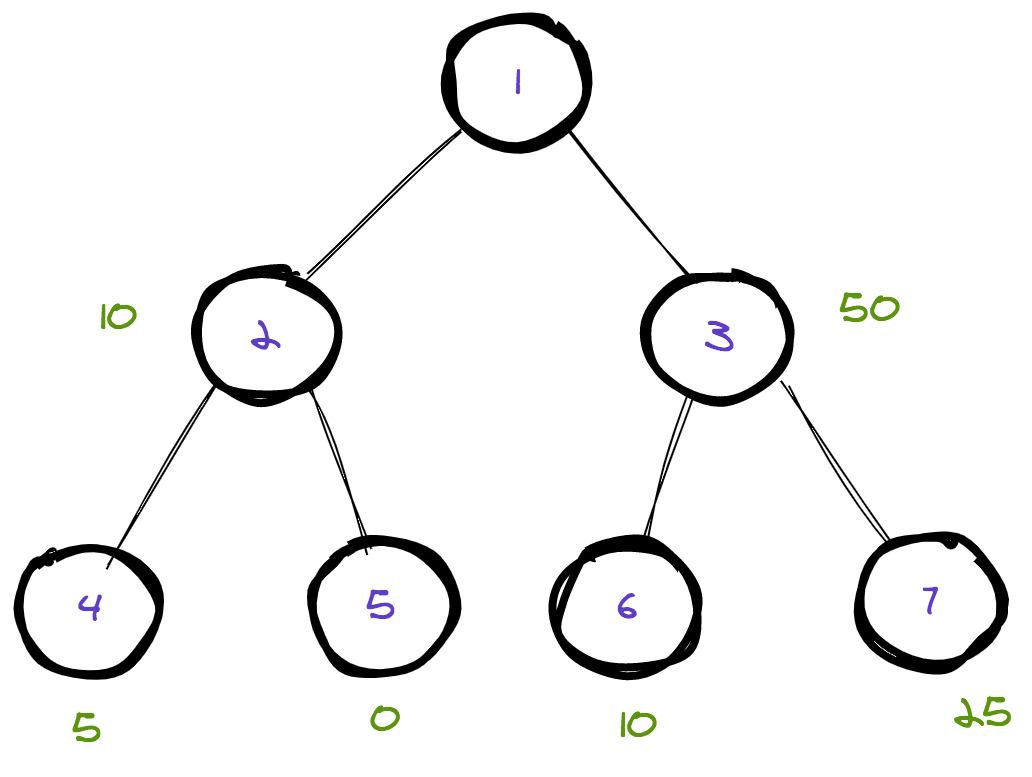

In [1]:
from IPython.display import Image
Image(filename='img/tree1.png', width=400)
#![Example node tree](img/tree1.png "Example Tree 1") #markdown cells only. resize not possible?

In [75]:
import numpy as np 
#create taxa and levels matrix: "Who is the ancestor of given taxa at each level?" Including self.
tree_map_matrix = np.array([[1,-1,-1], [1,2,-1], [1,3,-1], [1,2,4], [1,2,5], [1,3,6], [1,3,7]])
#optimize by filling in recursively -3 has all of the same ancestors as 6. want to optimize this so it isn't redundant
print("tree_map_matrix")
print(tree_map_matrix)

#create taxa and kmer counts vector:
kmer_counts = np.array([[0,10,50,5,0,10,25]])
print("\n kmer_counts")
print(kmer_counts)
##considered filtering: kmer>0. however, later this would require a taxa index string. Therefore, for speed of computation, retain zeroes.


tree_map_matrix
[[ 1 -1 -1]
 [ 1  2 -1]
 [ 1  3 -1]
 [ 1  2  4]
 [ 1  2  5]
 [ 1  3  6]
 [ 1  3  7]]

 kmer_counts
[[ 0 10 50  5  0 10 25]]


### Outline of computation:

In [ ]:
#compute level_counts vector. consisting of:  taxa at level L+1, kmer count.
in this case for level 2 in levels our desired output is:
level_counts = np.array([[15,10,60,75]])
indexing string: 4,5,6,7

In [ ]:
#pseudcode of logic:

#compute level_counts vector. consisting of:  taxa at level L+1, kmer count.
   
for levels in tree_map_matrix[ #go through level 1-3 in tree_map_matrix (columns)
for levels in len(treemapmatrix): -- iterate through column dimension [1:] 
    for taxa,t in enumerate(taxa) #"for each taxa:""
    ##enumerate is fast way to iterate - gives index and value easily
    level_counts([t])
    
Ex: while tree_map_matrix[:,2]:  #want to iterate through the 2, replace "2" with variable for looping

    
#filter:
found kmers= kmer_counts(kmer_counts>0)
#desired output: kmer counts> 0,3 for a given level- in this case 3
#from level 3- 7, 6, 6, 7
#unique: 6, 7 . but populate with zeroes so don't have to index
    
    
level_counts[t]=sum(found_kmers[tree_matrix[,3]])=t] #3 is L level or L+1

unique(tree_matrix[found_kmers >0, L]) 

sum(found_kmers[level_t_parent==t)]) # I th

max (level_counts) / sum(level_counts)
then- if max (level_counts) / sum(level_counts) > threshold then -- choose path



##planning on using integers representing nodes to indicate taxa. if this doesn't work or if for some reason need indices to make it faster can continue to use integers)




In [77]:
#Real Input. Kraken Stdout file
!head -3 /Users/klane/work/Kraken_output_example.txt

Loading database information... done.
C	NS500496_752_HC532BGXB:1:11101:11549:16160#CGAGGCTGCTCCTTAC	3000003	75|75	1747:25	3000003:6	1747:1	3000003:9	|:|	3000003:3	1747:3	3000003:5	1747:30
C	NS500496_752_HC532BGXB:1:11101:17670:16468#CGAGGCTGCTCCTTAC	1747	75|75	1747:41	|:|	1747:41


In [ ]:
#Parsing the raw input into matrices:
import os
import sys
import re

from collections import defaultdict
dd = defaultdict(int)

with open('Kraken_output_example.txt') as infile:
#with open(sys.argv[1]) as infile:
    for line in infile:
        line = line.strip().split('\t')
        if len(line) >1 and line[0] != 'U': #skip "Loading..." , "U" unclassifieds, and other possible lines with issues
            read_name = line[1]
            print(node_1)
            
#pseudocode from here
            print(line[4:])
            for line[4:] where line[] != re.search'|:|':
                k = line[4:].split(':')[0]#keys are nodenames
                v = line[4:].split(':')[1] #values are kmer counts
                
                short way:
                dd[k] += int(v) #because inherently keys must be unique. use matrix with location instead of dictionary

                        
                #with the dictionary for a given line, output matrix:
                data = list(dd.items())
                kmer_count_matrix= np.array(data)
                
                #compute tree_map_matrix. Optimize this so that not re-computing each time.
                #challenge of real input instead of mock data - nodes with mapped kmers are not direct parents/daughters
infile.close()
